In [19]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([  10.,    0.,   53.,    0.,  681.,    0.,  638.,    0.,  199.,   18.]),
 array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ]),
 <a list of 10 Patch objects>)

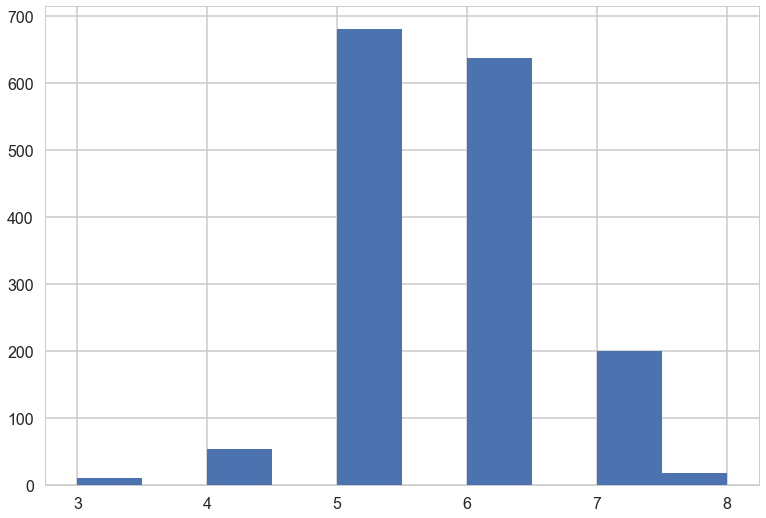

In [7]:
plt.hist(df['quality'])

In [8]:
Y = df.quality.values
X = df.drop(['quality'], axis = 1)
Y = np.array([1 if y >= 7 else 0 for y in Y])


In [9]:
# Train test split
train, test = train_test_split(range(df.shape[0]), train_size = 0.8, random_state = 66)
mask = np.zeros(df.shape[0], dtype=np.int64)
mask[train] = 1
mask = mask == 1

In [10]:
# See the distribution of good wine in train and test set
print('Good win in train set is: %0.2f%%' %(np.sum(Y[mask])*100/df[mask].shape[0]))
print('Good win in train set is: %0.2f%%' %(np.sum(Y[~mask])*100/df[~mask].shape[0]))

Good win in train set is: 13.53%
Good win in train set is: 13.75%


### Decision Tree

In [11]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
parameter = {'max_depth': np.arange(2,8), 'min_samples_leaf': np.arange(2, 8)}

gs = GridSearchCV(clftree, parameter, cv = 5, scoring = 'f1')
gs.fit(X[mask], Y[mask])

C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113:

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([2, 3, 4, 5, 6, 7]), 'max_depth': array([2, 3, 4, 5, 6, 7])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [20]:
gs.best_params_, gs.best_score_
clftree = gs.best_estimator_
clftree.fit(X[mask], Y[mask])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [25]:
ypred = clftree.predict(X[~mask])
cm = confusion_matrix(Y[~mask], ypred)
accuracy_train = accuracy_score(Y[mask], clftree.predict(X[mask]))
accuracy_test = accuracy_score(Y[~mask], ypred)
print('confusion matrix: \n', cm)
print('=====================================')
print('accuracy in training set is: %0.2f%%' % (accuracy_train*100))
print('accuracy in testing set is: %0.2f%%' % (accuracy_test*100))

confusion matrix: 
 [[254  22]
 [ 27  17]]
accuracy in training set is: 93.90%
accuracy in testing set is: 84.69%
